## Descripción del Dataset
Base de datos de reconocimiento de actividad humana (HAR) construida a partir de las grabaciones de 30 sujetos que realizan actividades de la vida diaria (ADL) mientras llevan un teléfono inteligente montado en la cintura con sensores de inercia integrados.

Cada persona realizó seis actividades (Caminar, Caminar cuesta arriba, Caminar cuesta abajo, Sentado, De pie, Acostado) con un teléfono inteligente (Samsung Galaxy S II) en la cintura. Usando su acelerómetro y giroscopio integrados, se captura la aceleración lineal 3-axial y la velocidad angular 3-axial a una tasa constante de 50Hz.

### Información de los atributos

Entrada:

* 561 atributos que indican en forma de vector las variables que captan los sensores:
    * Aceleración triaxial del acelerómetro (aceleración total) y la aceleración corporal estimada.
    * Velocidad angular triaxial del giroscopio.

Salida (nuestro objetivo en la clasificación):

* Class: Variable categórica mapeada a numérica:
    * 1: Caminando
    * 2: Caminando cuesta arriba
    * 3: Caminando cuesta abajo
    * 4: Sentado
    * 5: De pie
    * 6: Acostado

## Importación de librerías

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import kerastuner as kt

from tensorflow import keras
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Descarga de datos
Obtenemos el set de datos al que vamos a aplicar la clasificación

In [2]:
url='https://drive.google.com/file/d/1UrhszIqhL0Pu9Nme2su4DveONaeGRFfe/view?usp=sharing'
url2='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url2)
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V553,V554,V555,V556,V557,V558,V559,V560,V561,Class
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,5
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,5
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,5
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989303,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,5
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10294,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,-0.376278,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784,2
10295,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,-0.320418,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412,2
10296,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.118854,-0.467179,-0.181560,0.088574,0.696664,0.363139,-0.655357,0.274479,0.181184,2
10297,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,0.007471,...,-0.205445,-0.617737,0.444558,-0.819188,0.929294,-0.008398,-0.659719,0.264782,0.187563,2


Comprobamos si tiene valores desconocidos

In [3]:
df.isna().sum()

V1       0
V2       0
V3       0
V4       0
V5       0
        ..
V558     0
V559     0
V560     0
V561     0
Class    0
Length: 562, dtype: int64

No existen valores desconocidos

## Estadísticas de los datos

In [4]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V553,V554,V555,V556,V557,V558,V559,V560,V561,Class
count,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,...,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000
mean,0.274347,-0.017743,-0.108925,-0.607784,-0.510191,-0.613064,-0.633593,-0.525697,-0.614989,-0.466732,...,-0.298592,-0.617700,0.007705,0.002648,0.017683,-0.009219,-0.496522,0.063255,-0.054284,3.624624
std,0.067628,0.037128,0.053033,0.438694,0.500240,0.403657,0.413333,0.484201,0.399034,0.538707,...,0.320199,0.308796,0.336591,0.447364,0.616189,0.484770,0.511158,0.305468,0.268898,1.743695
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262624,-0.024903,-0.121019,-0.992360,-0.976990,-0.979137,-0.993294,-0.977017,-0.979064,-0.935788,...,-0.536174,-0.841848,-0.124694,-0.287031,-0.493108,-0.389041,-0.817287,0.002151,-0.131880,2.000000
50%,0.277174,-0.017162,-0.108596,-0.943030,-0.835032,-0.850773,-0.948244,-0.843670,-0.845068,-0.874825,...,-0.335160,-0.703402,0.008146,0.007668,0.017192,-0.007186,-0.715631,0.182028,-0.003882,4.000000
75%,0.288354,-0.010625,-0.097589,-0.250293,-0.057336,-0.278737,-0.302033,-0.087404,-0.288149,-0.014641,...,-0.113167,-0.487981,0.149006,0.291490,0.536137,0.365996,-0.521503,0.250791,0.102970,5.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000


## Balance de datos
Se debe comprobar como de balanceados se encuentran nuestros datos, esto consiste en comprobar el número de observaciones que tenemos por cada clase de salida. Muchos algoritmos son muy sensibles a estas diferencias de proporción, por eso es importante contar con un set de datos balanceado.

6    1944
5    1906
4    1777
1    1722
2    1544
3    1406
Name: Class, dtype: int64

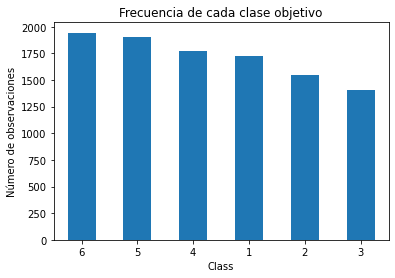

In [5]:
count_classes = pd.value_counts(df['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Frecuencia de cada clase objetivo")
plt.xlabel("Class")
plt.ylabel("Número de observaciones");
count_classes

En general el número de observaciones de cada clase en nuestro set de datos está bastante balanceado, además no sobresale ninguno en exceso. Más adelante veremos si tenemos algún problema en la clasificación en este sentido.

### Datos de entrenamiento y datos de prueba

Después de varías iteraciones vemos que la mejor opción es dividir los datos en un 80% de entrenamiento y 20% de prueba

In [6]:
array = df.values
X = array[:,0:561]
Y = array[:,561]
X_train, X_validation, Y_train, Y_validation = train_test_split(
X, Y, test_size=0.2, random_state=1, shuffle=True)

# Clasificación mediante algoritmo clasificador

### Cargamos los algoritmos
Añadimos varios algoritmos conocidos para ver cual de todos funciona mejor con nuestro set de datos. El mejor será el elegido para nuestra comparación con la red neuronal.

In [7]:
models = []
models.append(("RFC", RandomForestClassifier(n_jobs=2, random_state=0)))
models.append(("KNN", KNeighborsClassifier()))
models.append(("NB", GaussianNB()))
models.append(("SVC", SVC(gamma='auto')))
models.append(("MLP", MLPClassifier(activation="relu", alpha=1e05, batch_size="auto",beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e08, hidden_layer_sizes=(3, 3),learning_rate="constant", learning_rate_init=0.001, max_iter=200, momentum=0.9, nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True, solver="lbfgs", tol=0.0001, validation_fraction=0.1, verbose=False, warm_start=False)))

### Evaluamos cada modelo por turnos

In [8]:
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

RFC: 0.976697 (0.004907)
KNN: 0.962739 (0.004971)
NB: 0.725453 (0.026185)
SVC: 0.952301 (0.007418)
MLP: 0.192014 (0.000479)


### Comparación de algoritmos gráficamente

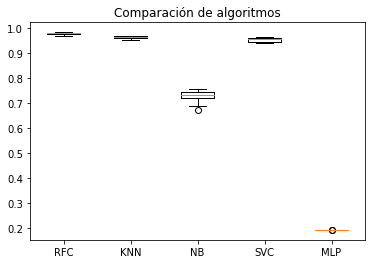

In [9]:
pyplot.boxplot(results, labels=names)
pyplot.title('Comparación de algoritmos')
pyplot.show()

El algoritmo que mejor resultados obtiene es Random Forest Classification (RFC), por tanto es el que vamos a utilizar contra el basado en redes neuronales

## RandomForest

In [10]:
# Cargamos el algoritmo
model = RandomForestClassifier()
name = 'RFC'

# Utilizaremos una validación cruzada estratificada de 10 veces (k-fold) para estimar la precisión del modelo
k_fold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
# Resultados de la precisión
cv_results = cross_val_score(model, X_train, Y_train, cv=k_fold, scoring='accuracy')
results.append(cv_results)
print('\nClasificador: %s %s %f (%f)' % (name, '\nprecision media: ', cv_results.mean(), cv_results.std()))
# Ejecutamos modelo
model.fit(X_train, Y_train)
# Hacemos una predicción con nuestro modelo
predictions = model.predict(X_validation)
# Evaluamos las predicciones y obtenemos cual ha sido la precisión
print('Precision de una prediccion: ', accuracy_score(Y_validation, predictions))
# Matriz de confusión
print('\nMatriz de confusion: \n', confusion_matrix(Y_validation, predictions))
# El reporte de clasificación que muestra un desglose de cada clase por precisión, recuerdo,  puntuación f1 y apoyo
print('\nReporte de clasificacion: \n', classification_report(Y_validation, predictions))

# Valores para la comparativa
# Falsos positivos
FP = confusion_matrix(Y_validation, predictions).sum(axis=0) - np.diag(
    confusion_matrix(Y_validation, predictions))
# Falsos negativos
FN = confusion_matrix(Y_validation, predictions).sum(axis=1) - np.diag(
    confusion_matrix(Y_validation, predictions))
# Verdaderos positivos
TP = np.diag(confusion_matrix(Y_validation, predictions))
# Verdaderos negativos
TN = confusion_matrix(Y_validation, predictions).sum() - (FP + FN + TP)
# True positive rate (sensitivity)
TPR = TP / (TP + FN)
# True negative rate (specify)
TNR = TN / (TN + FP)
# False positive rate
FPR = FP / (FP + TN)
# Positive predicted value
PPV = TP / (TP + FP)
# Negative predicted value
NPV = TN / (TN + FN)

# Mostrar Resultados
print(name + " FP: " + str(FP.sum()))
print(name + " FN: " + str(FN.sum()))
print(name + " TP: " + str(TP.sum()))
print(name + " TN: " + str(TN.sum()))
print(name + " TPR: " + str(TPR.mean()))
print(name + " TNR: " + str(TNR.mean()))
print(name + " FPR: " + str(FPR.mean()))
print(name + " PPV: " + str(PPV.mean()))
print(name + " NPV: " + str(NPV.mean()))


Clasificador: RFC 
precision media:  0.976332 (0.003735)
Precision de una prediccion:  0.9791262135922331

Matriz de confusion: 
 [[348   3   4   0   0   0]
 [  0 302   2   0   0   0]
 [  1   6 277   0   0   0]
 [  0   0   0 348  18   0]
 [  0   0   0   9 380   0]
 [  0   0   0   0   0 362]]

Reporte de clasificacion: 
               precision    recall  f1-score   support

         1.0       1.00      0.98      0.99       355
         2.0       0.97      0.99      0.98       304
         3.0       0.98      0.98      0.98       284
         4.0       0.97      0.95      0.96       366
         5.0       0.95      0.98      0.97       389
         6.0       1.00      1.00      1.00       362

    accuracy                           0.98      2060
   macro avg       0.98      0.98      0.98      2060
weighted avg       0.98      0.98      0.98      2060

RFC FP: 43
RFC FN: 43
RFC TP: 2017
RFC TN: 10257
RFC TPR: 0.979456380132166
RFC TNR: 0.9958041608086244
RFC FPR: 0.004195839191375506


## Conclusiones del modelo
Tenemos una precisón media de 0.976, lo cual es un valor muy alto e indica que nuestro modelo tiene un gran acierto al predecir pertenencia de clase.

Para las clases '1', '4' y '6' (caminando, sentado y acostado) tenemos una alta precisión y un menor recall, esto podría indicarnos que el modelo es peor detectando la clase pero cuando lo hace es muy confiable, de igual forma los 2 valores son casi 1 lo cual indica que casi alcanza la perfección.

En las clases '2', '3' y '5' (caminando cuesta arriba, caminando cuesta abajo y estando de pie) tenemos un recall mayor que la precisión, esto nos indicaría que se detecta muy bien la clase pero no es del todo confiable.

Si observamos el valor de f1-score que es dado por la media harmonía de precisión y recall, tenemos que la clase que mejor se detecta es la '6' (estar de pie), y la que peor es la '4' (estar sentado). Aunque en general los valores son casi 1 por lo que se puede afirmar que el modelo maneja perfectamente todas las clases.

Además, no obtenemos alto valor de precisión en la clase Mayoritaria y un bajo recall en la clase Minoritaria, por lo que tambien podemos decir que se trata de un set de datos muy bien balanceado.

# Clasificación basado en redes neuronales mediante TensorFlow

## Construir el Modelo

Construir la red neuronal requiere configurar las capas del modelo y luego compilar el modelo.

### Configurar las Capas

Los bloques de construccion basicos de una red neuronal son las *capas* o *layers*. Las capas extraen representaciones de el set de datos que se les alimentan. Con suerte, estas representaciones son considerables para el problema que estamos solucionando.

La mayoria de aprendizaje profundo consiste de unir capas sencillas. 
La mayoria de las capas como `tf.keras.layers.Dense`, tienen parametros que son aprendidos durante el entrenamiento.

### Compilar el modelo
* *Optimizer* — Esto es como el modelo se actualiza basado en el set de datos que ve y la funcion de perdida.
* *Loss* —Esto mide que tan exacto es el modelo durante el entrenamiento. Quiere minimizar esta funcion para dirigir el modelo en la direccion adecuada.
* *Metrics* — Se usan para monitorear los pasos de entrenamiento y de pruebas. Usamos Accuracy para saber la proporción de las clases que son correctamente clasificadas.

In [19]:
dim = X_train.shape[1]
def model_builder(hp):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_dim = dim))

    # Valor óptimo de la densidad de las capas entre 32 y 512
    hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
    print(hp_units)
    model.add(keras.layers.Dense(units=hp_units, activation='relu'))
    model.add(keras.layers.Dense(units=hp_units, activation='relu'))
    model.add(keras.layers.Dense(7, activation='softmax'))

    # Valor óptimo del 'learning rate' (0.01, 0.001, o 0.0001)
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                  loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

    return model

El algoritmo de ajuste 'hyperband' utiliza la asignación de recursos adaptativa y la detención anticipada para converger rápidamente en un modelo de alto rendimiento. Entrena una gran cantidad de modelos durante algunas épocas y lleva solo la mitad de los modelos con mejor rendimiento a la siguiente ronda.

In [20]:
tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     directory='my_dir',
                     project_name='intro_to_kt')

INFO:tensorflow:Reloading Oracle from existing project my_dir\intro_to_kt\oracle.json
32
INFO:tensorflow:Reloading Tuner from my_dir\intro_to_kt\tuner0.json


Utilizamos 'stop_early' para detener el entrenamiento antes de alcanzar un cierto valor en la pérdida de validación.

In [21]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

Obtenemos los 'hiperparámetros' óptimos

In [22]:
tuner.search(X_train, Y_train, epochs=200, validation_split=0.2, callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")

INFO:tensorflow:Oracle triggered exit

The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 96 and the optimal learning rate for the optimizer
is 0.01.



## Entrenar el Modelo

Se entrenan los datos mediante el metodo fit que ajusta el modelo con los datos de entrenamiento que estan en los arrays X_train e Y_train

In [23]:
# Build the model with the optimal hyperparameters and train it on the data for 50 epochs
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train, Y_train, epochs=200, validation_split=0.2)

val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

96
Epoch 1/200
206/206 [==============================] - 1s 4ms/step - loss: 0.4683 - accuracy: 0.8120 - val_loss: 0.3238 - val_accuracy: 0.8647
Epoch 2/200
206/206 [==============================] - 1s 3ms/step - loss: 0.1624 - accuracy: 0.9370 - val_loss: 0.2254 - val_accuracy: 0.9041
Epoch 3/200
206/206 [==============================] - 1s 3ms/step - loss: 0.1578 - accuracy: 0.9386 - val_loss: 0.3171 - val_accuracy: 0.9029
Epoch 4/200
206/206 [==============================] - 1s 3ms/step - loss: 0.1353 - accuracy: 0.9504 - val_loss: 0.0767 - val_accuracy: 0.9672
Epoch 5/200
206/206 [==============================] - 1s 3ms/step - loss: 0.1030 - accuracy: 0.9612 - val_loss: 0.0748 - val_accuracy: 0.9684
Epoch 6/200
206/206 [==============================] - 1s 3ms/step - loss: 0.0876 - accuracy: 0.9645 - val_loss: 0.1014 - val_accuracy: 0.9600
Epoch 7/200
206/206 [==============================] - 1s 3ms/step - loss: 0.0940 - accuracy: 0.9630 - val_loss: 0.0863 - val_accuracy: 0.9

Epoch 58/200
206/206 [==============================] - 1s 3ms/step - loss: 0.0501 - accuracy: 0.9812 - val_loss: 0.0573 - val_accuracy: 0.9775
Epoch 59/200
206/206 [==============================] - 1s 3ms/step - loss: 0.0447 - accuracy: 0.9816 - val_loss: 0.0553 - val_accuracy: 0.9775
Epoch 60/200
206/206 [==============================] - 1s 3ms/step - loss: 0.0458 - accuracy: 0.9818 - val_loss: 0.0776 - val_accuracy: 0.9703
Epoch 61/200
206/206 [==============================] - 1s 3ms/step - loss: 0.0414 - accuracy: 0.9832 - val_loss: 0.0562 - val_accuracy: 0.9794
Epoch 62/200
206/206 [==============================] - 1s 3ms/step - loss: 0.0400 - accuracy: 0.9845 - val_loss: 0.0520 - val_accuracy: 0.9800
Epoch 63/200
206/206 [==============================] - 1s 3ms/step - loss: 0.0489 - accuracy: 0.9812 - val_loss: 0.0616 - val_accuracy: 0.9782
Epoch 64/200
206/206 [==============================] - 1s 3ms/step - loss: 0.1139 - accuracy: 0.9724 - val_loss: 0.1054 - val_accuracy:

Epoch 115/200
206/206 [==============================] - 1s 3ms/step - loss: 0.0400 - accuracy: 0.9853 - val_loss: 0.0579 - val_accuracy: 0.9788
Epoch 116/200
206/206 [==============================] - 1s 3ms/step - loss: 0.0339 - accuracy: 0.9859 - val_loss: 0.0545 - val_accuracy: 0.9800
Epoch 117/200
206/206 [==============================] - 1s 3ms/step - loss: 0.0398 - accuracy: 0.9859 - val_loss: 0.0568 - val_accuracy: 0.9806
Epoch 118/200
206/206 [==============================] - 1s 3ms/step - loss: 0.0548 - accuracy: 0.9800 - val_loss: 0.0602 - val_accuracy: 0.9788
Epoch 119/200
206/206 [==============================] - 1s 3ms/step - loss: 0.0349 - accuracy: 0.9874 - val_loss: 0.0571 - val_accuracy: 0.9818
Epoch 120/200
206/206 [==============================] - 1s 3ms/step - loss: 0.0323 - accuracy: 0.9877 - val_loss: 0.0584 - val_accuracy: 0.9794
Epoch 121/200
206/206 [==============================] - 1s 3ms/step - loss: 0.0348 - accuracy: 0.9879 - val_loss: 0.0653 - val_ac

206/206 [==============================] - 1s 3ms/step - loss: 0.0336 - accuracy: 0.9866 - val_loss: 0.0568 - val_accuracy: 0.9800
Epoch 172/200
206/206 [==============================] - 1s 3ms/step - loss: 0.0314 - accuracy: 0.9886 - val_loss: 0.0848 - val_accuracy: 0.9715
Epoch 173/200
206/206 [==============================] - 1s 3ms/step - loss: 0.0306 - accuracy: 0.9879 - val_loss: 0.0561 - val_accuracy: 0.9800
Epoch 174/200
206/206 [==============================] - 1s 3ms/step - loss: 0.0306 - accuracy: 0.9879 - val_loss: 0.0576 - val_accuracy: 0.9812
Epoch 175/200
206/206 [==============================] - 1s 3ms/step - loss: 0.0319 - accuracy: 0.9886 - val_loss: 0.0552 - val_accuracy: 0.9800
Epoch 176/200
206/206 [==============================] - 1s 3ms/step - loss: 0.0345 - accuracy: 0.9871 - val_loss: 0.0563 - val_accuracy: 0.9800
Epoch 177/200
206/206 [==============================] - 1s 3ms/step - loss: 0.0318 - accuracy: 0.9879 - val_loss: 0.0583 - val_accuracy: 0.9788

Creamos una nueva instancia del hipermodelo y lo entrenamos con el número óptimo de épocas que hemos obtenido.

In [24]:
hypermodel = tuner.hypermodel.build(best_hps)

# Retrain the model
hypermodel.fit(X_train, Y_train, epochs=best_epoch, validation_split=0.2)

96
Epoch 1/96
206/206 [==============================] - 1s 4ms/step - loss: 0.4518 - accuracy: 0.8229 - val_loss: 0.1884 - val_accuracy: 0.9205
Epoch 2/96
206/206 [==============================] - 1s 3ms/step - loss: 0.1865 - accuracy: 0.9264 - val_loss: 0.1020 - val_accuracy: 0.9612
Epoch 3/96
206/206 [==============================] - 1s 3ms/step - loss: 0.1303 - accuracy: 0.9484 - val_loss: 0.1122 - val_accuracy: 0.9569
Epoch 4/96
206/206 [==============================] - 1s 3ms/step - loss: 0.1596 - accuracy: 0.9416 - val_loss: 0.1809 - val_accuracy: 0.9260
Epoch 5/96
206/206 [==============================] - 1s 3ms/step - loss: 0.1128 - accuracy: 0.9592 - val_loss: 0.0976 - val_accuracy: 0.9569
Epoch 6/96
206/206 [==============================] - 1s 3ms/step - loss: 0.1237 - accuracy: 0.9496 - val_loss: 0.1574 - val_accuracy: 0.9254
Epoch 7/96
206/206 [==============================] - 1s 3ms/step - loss: 0.0890 - accuracy: 0.9639 - val_loss: 0.1251 - val_accuracy: 0.9399
Epo

206/206 [==============================] - 1s 3ms/step - loss: 0.0411 - accuracy: 0.9829 - val_loss: 0.0496 - val_accuracy: 0.9812
Epoch 59/96
206/206 [==============================] - 1s 3ms/step - loss: 0.0386 - accuracy: 0.9845 - val_loss: 0.0550 - val_accuracy: 0.9788
Epoch 60/96
206/206 [==============================] - 1s 3ms/step - loss: 0.0420 - accuracy: 0.9832 - val_loss: 0.0508 - val_accuracy: 0.9818
Epoch 61/96
206/206 [==============================] - 1s 3ms/step - loss: 0.0440 - accuracy: 0.9827 - val_loss: 0.0584 - val_accuracy: 0.9769
Epoch 62/96
206/206 [==============================] - 1s 3ms/step - loss: 0.0381 - accuracy: 0.9863 - val_loss: 0.0724 - val_accuracy: 0.9715
Epoch 63/96
206/206 [==============================] - 1s 3ms/step - loss: 0.0416 - accuracy: 0.9839 - val_loss: 0.0564 - val_accuracy: 0.9806
Epoch 64/96
206/206 [==============================] - 1s 3ms/step - loss: 0.0451 - accuracy: 0.9832 - val_loss: 0.0562 - val_accuracy: 0.9788
Epoch 65/96

## Evaluar Precisión

In [25]:
eval_result = hypermodel.evaluate(X_validation, Y_validation)
print("[test loss, test accuracy]:", eval_result)

65/65 [==============================] - 0s 2ms/step - loss: 0.0407 - accuracy: 0.9854
[test loss, test accuracy]: [0.04072854295372963, 0.9854369163513184]


In [26]:
pred_train= hypermodel.predict(X_train)
scores = hypermodel.evaluate(X_train, Y_train, verbose=0)
print('Accuracy on training data: {}% \n Error on training data: {}'.format(scores[1], 1 - scores[1]))   
 
pred_test= hypermodel.predict(X_validation)
scores2 = hypermodel.evaluate(X_validation, Y_validation, verbose=0)
print('Accuracy on test data: {}% \n Error on test data: {}'.format(scores2[1], 1 - scores2[1]))    

Accuracy on training data: 0.9888336062431335% 
 Error on training data: 0.011166393756866455
Accuracy on test data: 0.9854369163513184% 
 Error on test data: 0.01456308364868164


Este modelo alcanza una precisión de 0.985 sobre el set de datos de validación.

## Conclusiones
En el modelo que utiliza Random Forest obtenemos unos resultados muy buenos, una precisión del 0.976 y no existe ningún desbalanceo de la predicción entre clases.

Para el modelo clasificador basado en redes neuronales de TensorFlow los resultados son iguales e incluso un poco mejores, obteniendo una precisión del 0.985 en la clasificación.

Para estos datos puede considerarse que el modelo basado en redes neuronales es más efectivo en cuanto a precisión de clasificación, aunque la diferencia es mínima, los 2 tienen una gran efectividad.

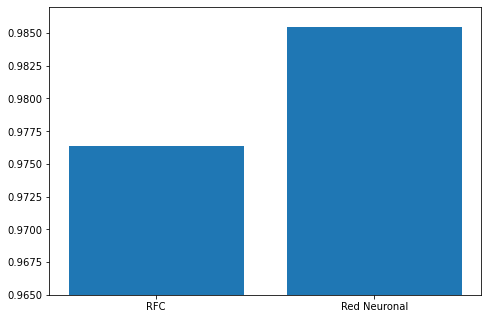

In [33]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
labels = ['RFC', 'Red Neuronal']
modelos = [cv_results.mean(), eval_result[1]]
ax.bar(labels,modelos)
plt.ylim([0.965,0.987])
plt.show()